**Boston Public Library**
I found the city of boston analytics department database, and it has all sorts of coolr stuff. Let's just load the BPL energy use and plot it, just to test things out, and just because I like libraries!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

read in the BPL data

In [2]:
BPL = pd.read_csv('https://data.boston.gov/dataset/652762e9-2556-47cd-8e80-798546992a57/resource/87c759ee-63b9-4aec-a00b-bba1672a20ef/download/copleylibraryelectricuse.csv', parse_dates=True, index_col=[0] )

print(BPL.head())

                     Total_Demand_KW
DateTime_Measured                   
2018-06-14 00:25:00            568.0
2018-06-14 00:20:00            568.0
2018-06-14 00:15:00            568.0
2018-06-14 00:10:00            604.0
2018-06-14 00:05:00            612.0


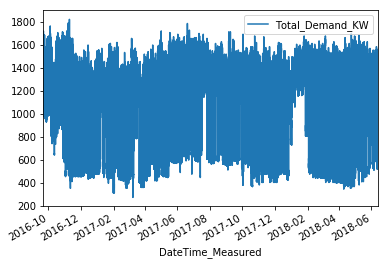

In [3]:
BPL.plot()

# plt.xlim(['June 1 2018', 'June 10 2018'])

Take a look at the distribution of power useage


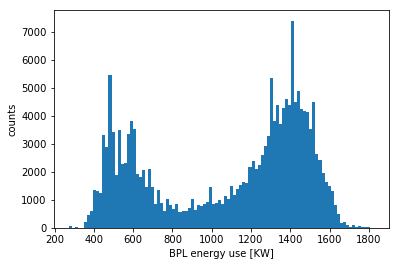

In [4]:
plt.hist(BPL.Total_Demand_KW, 100);
plt.xlabel('BPL energy use [KW]')
plt.ylabel('counts')

Looks like the power usage is pretty bimodal. Probably the peak around 600 KW is when the library is closed, and when everything is open the library uses about 1400 KW. Weekdays the library is open from 9 am to 9 pm. Weekends it closes at 5. Let's split the data roughly into open and closed and plot those histograms

In [7]:
open_hours = BPL.between_time('09:00', '21:00' )
closed_hours = BPL.between_time('21:00', '09:00' )

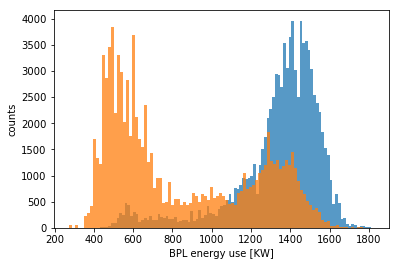

In [8]:
# plt.hist(BPL.Total_Demand_KW, 100);
plt.hist(open_hours.Total_Demand_KW, 100, alpha=0.75)
plt.hist(closed_hours.Total_Demand_KW, 100, alpha=0.75)
plt.xlabel('BPL energy use [KW]')
plt.ylabel('counts')

It does look like the peaks line up with the open and closed times. But there are still a lot of high usage values when the library is closed. We should check what this is about!